## Assemble the data

### Loading the data

In [1]:
!pip install fastai --upgrade -q

In [2]:
import fastai
print(fastai.__version__ )

2.0.10


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!cp -r drive/My\ Drive/PlantVillage.zip ./

In [ ]:
!unzip PlantVillage.zip

In [11]:
from fastai.vision.all import *

In [12]:
PATH_IMG = Path('PlantVillage')

In [13]:
dls = ImageDataLoaders.from_folder(PATH_IMG,
    valid_pct=0.2,
    bs=bs,
    # item_tfms=RandomResizedCrop(128, min_scale=0.35),
    batch_tfms=Normalize.from_stats(*imagenet_stats))

And we can have a look at our data:

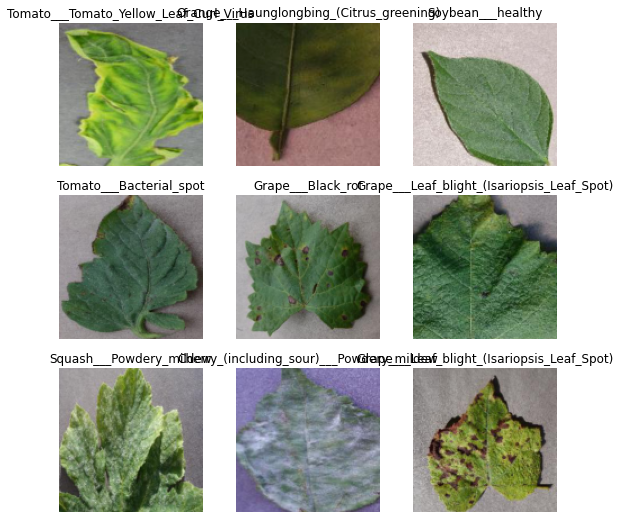

In [14]:
dls.show_batch()

## Training

### Building a `Learner`

In [15]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy,error_rate], pretrained=True)

In [16]:
#slow
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.448154,0.177779,0.941385,0.058615,02:30
1,0.193651,0.078895,0.974191,0.025809,02:31
2,0.123011,0.050202,0.982461,0.017539,02:31
3,0.088606,0.036367,0.987096,0.012904,02:31
4,0.076819,0.036223,0.986550,0.013450,02:30


In [17]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.107679,0.042042,0.985642,0.014358,02:31
1,0.081634,0.030216,0.988913,0.011087,02:31


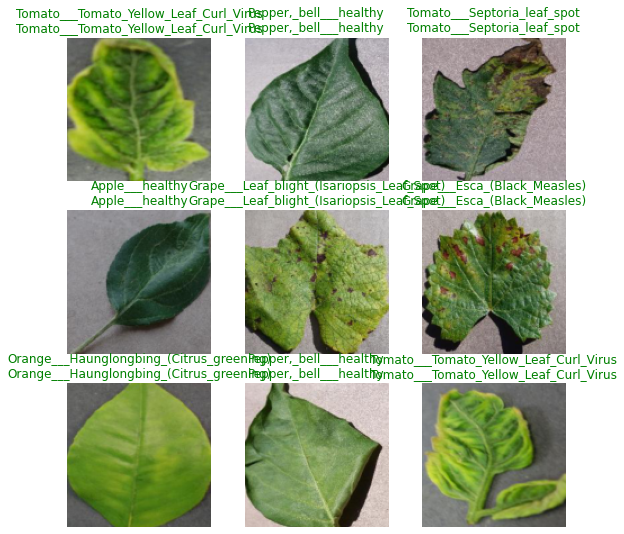

In [18]:
learn.show_results()

In [19]:
learn.save('train_7_cycles')

Path('PlantVillage/models/train_7_cycles.pth')

SuggestedLRs(lr_min=2.7542287716642023e-05, lr_steep=6.309573450380412e-07)

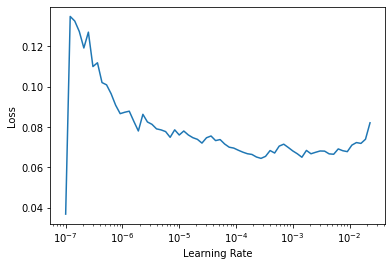

In [23]:
learn.lr_find()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.281518,0.267026,0.916031,0.083969,02:39
1,0.104404,0.048744,0.982461,0.017539,02:37
2,0.044359,0.023174,0.992276,0.007724,02:36


In [26]:
learn.fit_one_cycle(5, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.155356,0.104612,0.966649,0.033352,02:38
1,0.125003,0.145129,0.951745,0.048255,02:38
2,0.072624,0.038459,0.986005,0.013995,02:38
3,0.041652,0.020123,0.993457,0.006543,02:38
4,0.023464,0.013741,0.995638,0.004362,02:38


In [27]:
learn.save('train_lr_8_cycles')

Path('PlantVillage/models/train_lr_8_cycles.pth')

In [28]:
learn.export()

In [30]:
!echo lmao

lmao
